In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# to plot within notebook
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import sklearn
print(sklearn.__version__)

1.2.2


In [2]:
df = pd.read_csv("/content/drive/MyDrive/creditcard_sampledata_3.csv")

df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5050 non-null   int64  
 1   V1          5050 non-null   float64
 2   V2          5050 non-null   float64
 3   V3          5050 non-null   float64
 4   V4          5050 non-null   float64
 5   V5          5050 non-null   float64
 6   V6          5050 non-null   float64
 7   V7          5050 non-null   float64
 8   V8          5050 non-null   float64
 9   V9          5050 non-null   float64
 10  V10         5050 non-null   float64
 11  V11         5050 non-null   float64
 12  V12         5050 non-null   float64
 13  V13         5050 non-null   float64
 14  V14         5050 non-null   float64
 15  V15         5050 non-null   float64
 16  V16         5050 non-null   float64
 17  V17         5050 non-null   float64
 18  V18         5050 non-null   float64
 19  V19         5050 non-null  

In [4]:
df.describe()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,...,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,142870.017030,-0.014675,0.044325,-0.035144,0.002494,-0.046625,-0.046340,-0.043020,-0.008398,-0.027331,...,-0.003516,-0.009421,-0.004147,-0.001200,-0.003314,-0.004836,-0.005726,0.002482,86.117232,0.009901
std,82574.683531,1.952784,1.558235,1.691458,1.493592,1.321320,1.254301,1.338170,1.323247,1.134506,...,0.756735,0.724749,0.601276,0.599400,0.517363,0.481913,0.411055,0.302719,227.210259,0.099020
min,5.000000,-25.266355,-18.701995,-26.823673,-4.575708,-18.664251,-6.357009,-23.783470,-41.484823,-8.504285,...,-20.262054,-5.532541,-17.026156,-2.307453,-3.308049,-1.715640,-7.976100,-5.048979,0.000000,0.000000
25%,71817.750000,-0.926226,-0.589562,-0.873696,-0.871759,-0.733235,-0.777552,-0.571678,-0.211263,-0.651215,...,-0.231508,-0.558904,-0.161166,-0.354973,-0.316947,-0.331584,-0.070963,-0.052133,4.990000,0.000000
50%,142544.000000,0.009592,0.088726,0.168377,-0.027034,-0.060932,-0.304225,0.036753,0.000985,-0.052724,...,-0.035204,-0.013332,-0.011305,0.038272,0.019200,-0.059882,0.003521,0.012842,20.260000,0.000000
75%,215019.000000,1.310062,0.809298,1.017166,0.763626,0.603678,0.356664,0.594029,0.313264,0.568374,...,0.196481,0.509243,0.146835,0.441278,0.348177,0.228486,0.095662,0.077357,75.000000,0.000000
max,284782.000000,2.422508,14.323254,3.760965,11.885313,9.880564,7.473970,9.288494,16.633103,8.054123,...,19.283602,5.805795,13.218751,3.535179,3.590787,2.961609,4.623508,9.876371,4584.880000,1.000000


In [5]:
df.isnull().sum()

Unnamed: 0    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

In [6]:
df["Class"].value_counts()

0    5000
1      50
Name: Class, dtype: int64

In [7]:
df["Class"].value_counts(normalize=True)

0    0.990099
1    0.009901
Name: Class, dtype: float64

In [8]:
df.groupby("Class").mean()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,143084.8702,0.035030,0.011553,0.037444,-0.045760,-0.013825,-0.030885,0.014315,-0.022432,-0.002227,...,-0.002896,-0.010583,-0.010206,-0.003305,-0.000918,-0.002613,-0.004651,-0.009584,0.002414,85.843714
1,121384.7000,-4.985211,3.321539,-7.293909,4.827952,-3.326587,-1.591882,-5.776541,1.395058,-2.537728,...,0.194580,0.703182,0.069065,-0.088374,-0.029425,-0.073336,-0.023377,0.380072,0.009304,113.469000


In [9]:
df["flag_as_fraud"] = np.where(np.logical_and(df["V1"] < -3, df["V3"] < -5), 1, 0)
df["flag_as_fraud"].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: flag_as_fraud, dtype: int64

In [10]:
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=["Actual Fraud"], colnames=["Flagged Fraud"]))

Flagged Fraud     0   1
Actual Fraud           
0              4984  16
1                28  22


In [11]:
# load the dataset
df = pd.read_csv("/content/drive/MyDrive/banksim.csv")

print(df.shape)
df.head()

(7200, 6)


,Unnamed: 0,age,gender,category,amount,fraud
0,171915,3,F,es_transportation,49.71,0
1,426989,4,F,es_health,39.29,0
2,310539,3,F,es_transportation,18.76,0
3,215216,4,M,es_transportation,13.95,0
4,569244,2,M,es_transportation,49.87,0


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7200 non-null   int64  
 1   age         7200 non-null   object 
 2   gender      7200 non-null   object 
 3   category    7200 non-null   object 
 4   amount      7200 non-null   float64
 5   fraud       7200 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 337.6+ KB
None


In [13]:
df["fraud"].value_counts()

0    7000
1     200
Name: fraud, dtype: int64

In [14]:
df["fraud"].value_counts(normalize=True)

0    0.972222
1    0.027778
Name: fraud, dtype: float64

In [15]:
df.groupby("category").mean().sort_values(by="fraud", ascending=False)

<ipython-input-15-1cf60bd8335d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("category").mean().sort_values(by="fraud", ascending=False)


,Unnamed: 0,amount,fraud
category,,,
es_leisure,186541.307692,229.757600,1.000000
es_travel,338897.777778,231.818656,0.944444
es_sportsandtoys,238775.539474,157.251737,0.657895
es_otherservices,241279.000000,149.648960,0.600000
es_hotelservices,280138.548387,172.756245,0.548387
es_health,335355.176955,126.604704,0.242798
es_home,248312.583333,120.688317,0.208333
es_tech,310473.948718,132.852862,0.179487
es_hyper,244440.712500,46.788180,0.125000


In [16]:
df.groupby("age").mean()

<ipython-input-16-34cccc8120f4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("age").mean()


,Unnamed: 0,amount,fraud
age,,,
0,327520.450000,49.468935,0.050000
1,290985.509116,35.622829,0.026648
2,296867.958851,37.228665,0.028718
3,291471.417346,37.279338,0.023283
4,306041.396403,36.197985,0.035966
5,290885.960859,37.547521,0.023990
6,299193.716561,36.700852,0.022293
U,288372.181818,39.117000,0.000000


In [17]:
df["age"].value_counts().sort_index()

0      40
1     713
2    2333
3    1718
4    1279
5     792
6     314
U      11
Name: age, dtype: int64

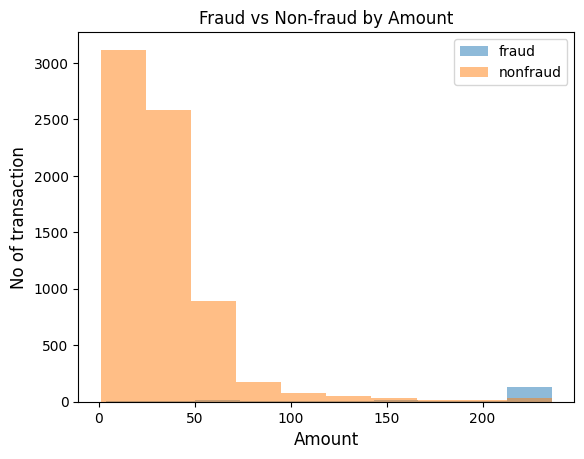

In [18]:
df_fraud = df.loc[df.fraud == 1] 
df_non_fraud = df.loc[df.fraud == 0]

# plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.title("Fraud vs Non-fraud by Amount")
plt.xlabel("Amount", fontsize=12)
plt.ylabel("No of transaction", fontsize=12)
plt.legend()
plt.show()

In [19]:
df = pd.read_csv("/content/drive/MyDrive/banksim_adj.csv")

print(df.shape)
df.head()

(7189, 19)


,Unnamed: 0,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,0,3,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,4,39.29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,3,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,4,13.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,2,49.87,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [20]:
df["fraud"].value_counts()

0    6989
1     200
Name: fraud, dtype: int64

In [21]:
df["fraud"].value_counts(normalize=True)

0    0.97218
1    0.02782
Name: fraud, dtype: float64

In [22]:
X = np.array(df.drop(["Unnamed: 0", "fraud"], axis=1)).astype(np.float)
y = df["fraud"].values

<ipython-input-22-587095bd93ef>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(df.drop(["Unnamed: 0", "fraud"], axis=1)).astype(np.float)


In [23]:
from sklearn.preprocessing import MinMaxScaler

# define the scaler and apply to the data, default feature_range=(0, 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
from sklearn.cluster import MiniBatchKMeans

# Define the model 
# default: n_clusters=8, init='k-means++', max_iter=100, batch_size=100,
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(random_state=0)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: Futur

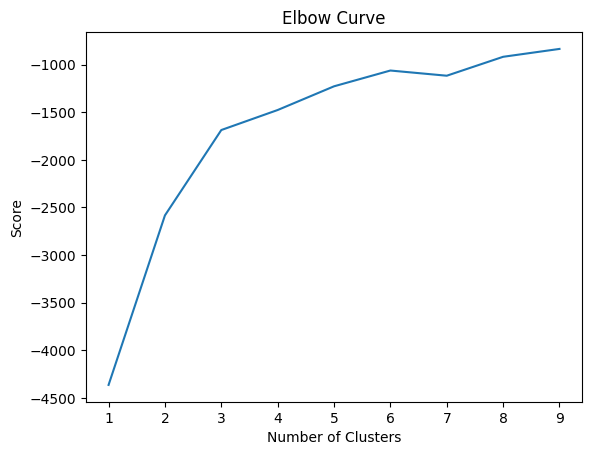

In [25]:
clustno = range(1, 10)

# run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# plot the models and their respective score 
plt.plot(clustno , score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: Futur

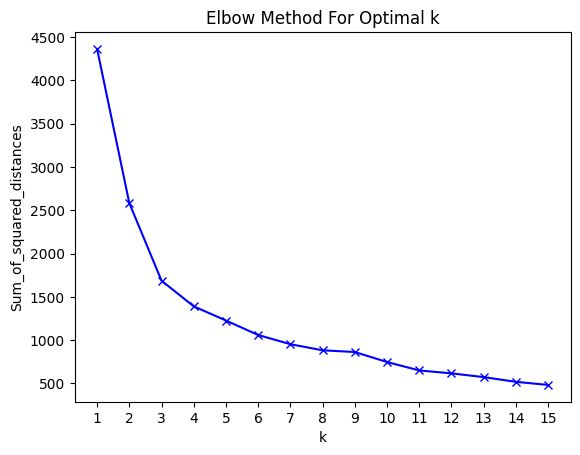

In [26]:
Sum_of_squared_distances = []
# Cluster_centers = []
clustno = range(1,16)
for k in clustno:
    km = MiniBatchKMeans(n_clusters=k, random_state=0)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)
#     Cluster_centers.append(km.cluster_centers_)
    
# print("There are {} clusters.".format(len(Cluster_centers), "\n"))
plt.plot(clustno, Sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow Method For Optimal k")
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)

# save the cluster centroids
X_test_clusters_centers = kmeans.cluster_centers_

# calculate the distance to the cluster centroids for each point
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# create fraud predictions based on outliers on clusters 
# define the boundary between fraud and non fraud to be at 95% of distance distribution and higher
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
km_y_pred[:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

Accuracy Score: 0.9592025961984237

ROC score = 0.8197704982668266



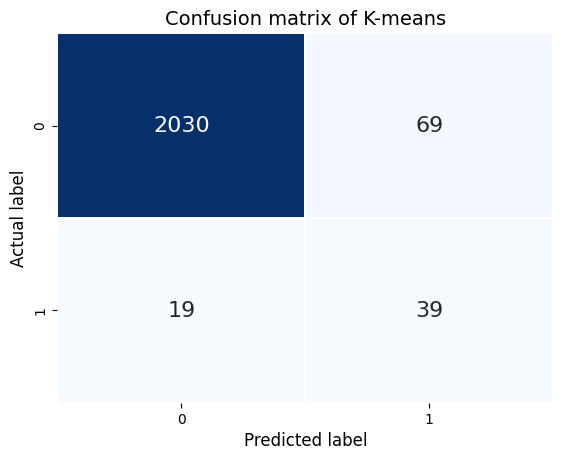

In [29]:
print("Accuracy Score: {}\n".format(accuracy_score(y_test, km_y_pred)))

# obtain the ROC score
print("ROC score = {}\n".format(roc_auc_score(y_test, km_y_pred)))

# create a confusion matrix
km_cm = confusion_matrix(y_test, km_y_pred)

# plot the confusion matrix in a figure to visualize results 
sns.heatmap(km_cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of K-means", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("_cm.png", bbox_inches="tight")
plt.show()